# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
#import tensor
# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
testing_file = 'traffic-signs-data/test.p'

# I named the data that this code reads from training_file as train_and_validate, since I will separate them later to train
# and validation subsets
with open(training_file, mode='rb') as f:
    train_and_validate = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
# categorizing the images and their labels    
X_train_and_validate, y_train_and_validate = train_and_validate['features'], train_and_validate['labels']
X_test, y_test = test['features'], test['labels']



assert(len(X_train_and_validate) == len(y_train_and_validate))
assert(len(X_test) == len(y_test))

print()
print("Image Shape: {}".format(X_train_and_validate[0].shape))
print(y_train_and_validate[0])
print()
print("Training and Validation Set:   {} samples".format(len(X_train_and_validate)))
print("Test Set:       {} samples".format(len(X_test)))




Image Shape: (32, 32, 3)
0

Training and Validation Set:   39209 samples
Test Set:       12630 samples


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
import numpy as np
from sklearn.utils import shuffle

### Replace each question mark with the appropriate value.

# TODO: Number of training examples
###In the next few lines, I separate some part of the training data and keep them for validation during the training phase
n_train_and_validate = len(X_train_and_validate) 

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train_and_validate[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = max(y_train_and_validate)+1

n_validate = 6000 # I separate 6000 data from the training set to use it as validationd data => helps with ~0.5% resolution in validation

print("ratio of validation to all training data: {:.2f}".format(n_validate/len(X_train_and_validate)))

class_count_train_and_validate = np.zeros(n_classes) # to get the total number of samples for each class
class_count_test = np.zeros(n_classes) #just for exploring how many test samples we have for each class
for i in range(0,n_classes):
    for j in range(0,n_train_and_validate):
        if y_train_and_validate[j] == i:
            class_count_train_and_validate[i] += 1
    for j in range(0,n_test):
        if y_test[j] == i:
            class_count_test[i] += 1      
    print("class",i, ": train and validate:", class_count_train_and_validate[i], ", test:", class_count_test[i],"=> test to train and validate ratio: {:.2f}".format(class_count_test[i]/class_count_train_and_validate[i]))
# I shuffle the data to randomly select some part for validation and some other part for training    
X_train_and_validate, y_train_and_validate = shuffle(X_train_and_validate, y_train_and_validate)
# here I determine how many samples from each class I should pick as the validation data since difference classes have different number of samples
validate_selection_count = (class_count_train_and_validate*n_validate/n_train_and_validate).astype(int)
print("Number of validation data from each class:", validate_selection_count)
X_train = []
y_train = []
X_validate = []
y_validate = []
for i in range(0,n_classes):
    ctr = 0
    for j in range(0,n_train_and_validate):
        if y_train_and_validate[j] == i:
            # if enough data from each class is not seperated for the validation set, add more
            if ctr < validate_selection_count[i]:
                X_validate.append(X_train_and_validate[j])
                y_validate.append(y_train_and_validate[j])
            # otherwise, pack them in the remaining data in the training set
            else:
                X_train.append(X_train_and_validate[j])
                y_train.append(y_train_and_validate[j])
            ctr += 1
print("Number of training and validation examples =", n_train_and_validate)
print("Number of training examples =", len(X_train))
print("Number of validation examples =", len(X_validate))
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


ratio of validation to all training data: 0.15
class 0 : train and validate: 210.0 , test: 60.0 => test to train and validate ratio: 0.29
class 1 : train and validate: 2220.0 , test: 720.0 => test to train and validate ratio: 0.32
class 2 : train and validate: 2250.0 , test: 750.0 => test to train and validate ratio: 0.33
class 3 : train and validate: 1410.0 , test: 450.0 => test to train and validate ratio: 0.32
class 4 : train and validate: 1980.0 , test: 660.0 => test to train and validate ratio: 0.33
class 5 : train and validate: 1860.0 , test: 630.0 => test to train and validate ratio: 0.34
class 6 : train and validate: 420.0 , test: 150.0 => test to train and validate ratio: 0.36
class 7 : train and validate: 1440.0 , test: 450.0 => test to train and validate ratio: 0.31
class 8 : train and validate: 1410.0 , test: 450.0 => test to train and validate ratio: 0.32
class 9 : train and validate: 1470.0 , test: 480.0 => test to train and validate ratio: 0.33
class 10 : train and valid

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

training label: 11
validation label: 25
test label: 9


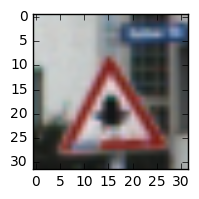

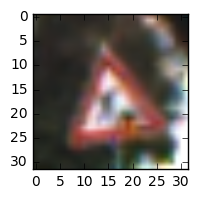

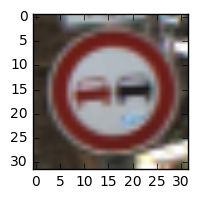

In [4]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

import random

index_train = random.randint(0, len(X_train))
image_train = X_train[index_train].squeeze()

plt.figure(figsize=(2,2))
plt.imshow(image_train)
print("training label:", y_train[index_train])

index_validate = random.randint(0, len(X_validate))
image_validate = X_validate[index_validate].squeeze()

plt.figure(figsize=(2,2))
plt.imshow(image_validate)
print("validation label:",y_validate[index_validate])

index_test = random.randint(0, len(X_test))
image_test = X_test[index_test].squeeze()

plt.figure(figsize=(2,2))
plt.imshow(image_test)
print("test label:",y_test[index_test])


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [5]:
### Preprocess the data here.
# I normalize the image data here to make the RGB values fall in [-1,1]
image_normalizer = 128*np.ones(X_train[0].shape)

X_train_normalized = []
X_validate_normalized = []
X_test_normalized = []
#some testing of the normalization (e.g. before and after test)
print("Before normalization")
print(X_train[0])
print(X_validate[0])
print(X_test[0])


for i in range(0,len(X_train)):
    X_train_normalized.append((X_train[i]-image_normalizer)/128)
for i in range(0,len(X_validate)):
    X_validate_normalized.append((X_validate[i]-image_normalizer)/128)
for i in range(0,len(X_test)):
    X_test_normalized.append(((X_test[i]).astype(float)-image_normalizer)/128)


print("Normalize version")
print(X_train_normalized[0])
print(X_validate_normalized[0])
print(X_test_normalized[0])    

### Feel free to use as many code cells as needed.




Before normalization
[[[129 138 151]
  [131 138 150]
  [131 137 150]
  ..., 
  [154 128 119]
  [129 114 109]
  [133 124 123]]

 [[127 137 159]
  [133 141 163]
  [134 139 164]
  ..., 
  [140 127 131]
  [136 128 129]
  [133 127 127]]

 [[144 154 170]
  [145 152 166]
  [148 153 173]
  ..., 
  [127 125 126]
  [128 125 125]
  [130 126 126]]

 ..., 
 [[ 93  94  98]
  [ 93  94  99]
  [ 93  95  97]
  ..., 
  [101 104 102]
  [104 107 106]
  [ 99 101 102]]

 [[ 91  94  89]
  [ 92  95  88]
  [ 91  94  92]
  ..., 
  [ 97 102 101]
  [ 99 107 106]
  [ 95 101 101]]

 [[100 106  89]
  [127 132 109]
  [100 102  93]
  ..., 
  [ 97 101 102]
  [100 106 106]
  [ 97 101 100]]]
[[[132 137 156]
  [127 131 148]
  [134 137 153]
  ..., 
  [135 120 114]
  [139 129 123]
  [144 139 133]]

 [[135 140 149]
  [134 138 141]
  [135 139 143]
  ..., 
  [137 130 131]
  [138 134 134]
  [136 133 135]]

 [[122 127 134]
  [123 128 131]
  [122 127 131]
  ..., 
  [129 130 130]
  [129 130 130]
  [131 130 130]]

 ..., 
 [[104 109 

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

When I normalized the image data using (RGB-128)/128 formula, the validation accuracy jumped from 74% to 80% for the FIRST epoch. This is because generally large range of inputs to the neural networks (e.g 0-255 from the pixel values) can saturate
 the neural network outputs for some ranges of input. This can be fixed when the neural network weights are trained in way that turns them smaller. However, another problem with small weights arises which is now the small input values (for example 0-20 for the pixel values) cannot affect the outputs correctly. Therefore, a normalized input range greatly helps the NN to learn the patterns for a wide range of inputs much more efficiently.
 
I did not change the images to grayscale because I thought the colors in traffic signs can be helpful for easier categorization of the signs (e.g. orange background color is usually used for temporary signs such as road work zones and yellow background is used for warning signs such as schools).

In [ ]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
I separated 6000 data from the original training data set for validation. I used such a number because of the notes pointed in the video lectures: 6000 = 200*30 samples and any change in the validation accuracy occuring for 30 samples or more is a signification change. Therefore, we can have a resolution of 0.5 percent change in the validation accuracy with 200 sets of 30 samples. 

I further shuflled the data before collecting the validation set from it to make sure each time I run the code I randomly mixed the data order. The precise values for the chosen data numbers are as follows:
Number of training and validation examples = 39209
Number of training examples = 33232
Number of validation examples = 5977
Therefore, I picked 15% of the data from each class (i.e. 5977/39209 ~ 0.15) and kept the rest for training. The exact numbers of data from each class is according to the following:

Number of validation data from classes 0-42: [ 32 339 344 215 302 284  64 220 215 224 307 201 321 330 119  96  64 169
 183  32  55  50  59  78  41 229  91  36  82  41  68 119  36 105  64 183
  59  32 316  45  55  36  36].
I kept the test data unchanged since we test all of them after training and calculate accuracy.

In [28]:
import tensorflow as tf

EPOCHS = 8
BATCH_SIZE = 64


In [7]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

from tensorflow.contrib.layers import flatten
# this architecture is similar to the LeNet lab but with different input channels and different class numbers
def LeNet_1(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    fc1    = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    fc2    = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits
# The LeNet_2 architecture is deepr than the previous one. I added more depth to the conlution layers to make 
# it able to learn more patters in the traffic signs
def LeNet_2(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x16.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 16), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(16))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x16. Output = 14x14x16.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x32.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 32), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(32))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x32. Output = 5x5x32.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x32. Output = 800.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 800. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(800, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    fc1    = tf.nn.relu(fc1)

    #  Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    fc2    = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

Since we had some satisfactory classification results in the LeNet lab and we were also suggested to start with the same architecture, I used those results as an starting point. However, I changed the number of input channels and classes in the first structure (LeNet_1 in the codes above). Later I defined LeNet 2 in which I increased the depth of convlution layers to improve the accuracy and learning capacity of CNN. Specifically, I doubled the depth of each layer but did not change any width in the fully connected layers since it does not generally help. Therefore, the final architecture that I was satisfied with looks like this:

Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x16.
Pooling. Input = 28x28x16. Output = 14x14x16.
Layer 2: Convolutional. Output = 10x10x32.
Pooling. Input = 10x10x32. Output = 5x5x32.
Flatten. Input = 5x5x32. Output = 800.
Layer 3: Fully Connected. Input = 800. Output = 120.
Layer 4: Fully Connected. Input = 120. Output = 84.
Layer 5: Fully Connected. Input = 84. Output = 43.

I also replaced the relu nonlinear activation functions in the convlution layers  with "tanh" but it did not help with improving the results.


In [8]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)


In [9]:
### Train your model here.
### Feel free to use as many code cells as needed.
rate = 0.001
# select a specific architechture number form the previously defined architectures: LeNet_1- LeNet_2
logits = LeNet_2(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
# I tried the following optimizers as well with different parameters for learning rate and regularization but it did not help
#optimizer = tf.train.ProximalAdagradOptimizer(learning_rate = rate)# for automatic adpatation of learning rate
#optimizer = tf.train.AdagradOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [10]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1)) #  Finds the maximum values of classes and checks if they are equal
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) # Calculates correct prediction and changes the typ to float. Then finds the mean
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [29]:
# training code
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_normalized)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_normalized, y_train = shuffle(X_train_normalized, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_normalized[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validate_normalized, y_validate)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        if validation_accuracy > 0.98:
            #reduce the learning rate for find tuning the weights instead of jumping around a minimum value for the loss function
            optimizer = tf.train.AdamOptimizer(learning_rate = rate/5)
            
        
    saver.save(sess, 'lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.934

EPOCH 2 ...
Validation Accuracy = 0.957

EPOCH 3 ...
Validation Accuracy = 0.967

EPOCH 4 ...
Validation Accuracy = 0.974

EPOCH 5 ...
Validation Accuracy = 0.981

EPOCH 6 ...
Validation Accuracy = 0.979

EPOCH 7 ...
Validation Accuracy = 0.984

EPOCH 8 ...
Validation Accuracy = 0.983

Model saved


In [30]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test_normalized, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.931


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

I realized that the default value for learning rate works fine with my code (0.001). However, in order to fine tune the training, I also tried switching the learning rate to a smaller one when the validation accuracy grew larger that 98%. This improved the test data accuracy by 1% probably 60 samples.

I tried different optimizers such as various forms of Adagrad to take advantage of adaptive learning rate. In several attemps, Adagrad produced much less accurate CNN compared to Adam optimizer. Only one exception occured when I used LeNet_2 with Adagrad optimizer. I realized that the validation accuracy reaches 99% which is more accurate thant the best case in Adam optimizer results. However, it seems that it results in overtraining the CNN and a 0.6% reduction in test data accuracy (~35 samples). Therefore, I settled for the results of Adam optimizer when I reduced the learning rate roughly to half at when the validation accuracy surpassed 98%. 

With this learning rate, usually around the 7th-8th epcoh, the learning improvement stops (reaches more or less a constant level of accuracy). Therefore, it is better to stop the training at this point by reducing the Epoch value to prevent overtraining (in other words early termination). 

I kept the number of hidden neurons in the fully connected layers unchanged since increasing them is not an efficient
way of improving the accuracy of predictions, instead, I added to the depth of the network by increasing the depth of conolution layers

Since I did not have any computation time issue, I reduced the batch size from 128 to 64 which increased the validation accuracy from 96% to 98%.

With all of these modifications, I usually get a validation accuracy of more than 90% in the first epoch. Therefore, I did not feel a need for tuning mu and sigma hyperparameters for initialization of the CNN wights.


### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

I explained many of the approaches I used in response to the Questions 3 and 4. I try to summarize them in the following and add a little bit more.

I checked different architectures such as LeNet_1 and LeNet_2 to see if I can make a difference in the classifier outputs. By adding more depth to the CNN in LeNet_2 I got better results. This happens because I started with a working solution from LeNet lab which I had to modify slightly. But compared to LeNet lab example, here we are trying to detect a more diverse set of patterns, e.g. different vehicle shapes, circules, lines, texts, etc. Therefore, the depth of convultion layers needs to be higher. I did not find any rule of thumb or a magic number. So, I tried larger depth which increased the test data classification accuracy by 10 percent. I tried different activation functions and optimizers but they did not result in higher accuracy. Therefore, I returned them back to the original form.

Besides, I tried a rough adaptive learning rate to improve the accuracy of the CNN. By reducing the learning rate at higher accuracies we can prevent jumps of the CNN outputs around the optimal point. I also reduced the batch size to let the CNN take advantage of more training data.



---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

The images are: <class 'numpy.ndarray'> with dimesions: (32, 32, 3)
Image labels are [0, 1, 1, 5, 5, 14, 14, 20, 22, 24, 25, 31, 37, 39]


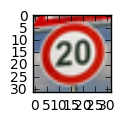

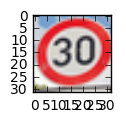

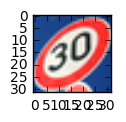

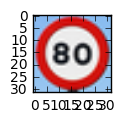

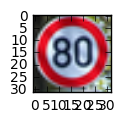

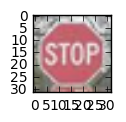

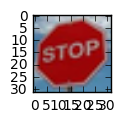

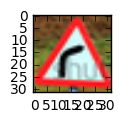

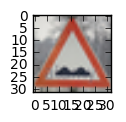

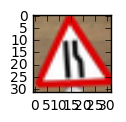

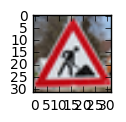

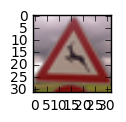

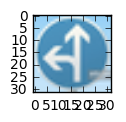

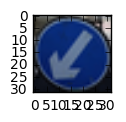

In [16]:
### Load the images and plot them here.
img_names = ['0','1','1_b','5','5_b','14','14_b','20','22','24','25','31','37','39']
y_extra = [0,1,1,5,5,14,14,20,22,24,25,31,37,39]# includes the correct labels for each image
X_extra = []
import matplotlib.image as mpimg
import pylab as pl
for i in range(0,len(img_names)):
    image = mpimg.imread('extra/'+img_names[i]+'.png')
    X_extra.append(image)
    image_extra = X_extra[i].squeeze()
    plt.figure(figsize=(1,1))
    plt.imshow(image_extra)

#printing out some stats and plotting
print('The images are:', type(image), 'with dimesions:', image.shape)
print('Image labels are', y_extra)

# For some reason, when I prepared the images in the correct size and format, they were normalized=> no need for redoing the normalization


### Feel free to use as many code cells as needed.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**
I prepared 14 images which I got from web. Most of them are normal pictures from some of the classes. However, I tried to include some images of traffic signs with shades or taken from different angles to test the robustness. You can see the images plotted above. The corresponding classification results in the following cells.
 



### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


In [31]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
#Here I evaluate the total accuracy for the 14 extra images I prepared


total_accuracy = 0
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_extra, y_extra)
    print("Test Accuracy for 14 images = {:.3f}".format(test_accuracy))



Test Accuracy for 14 images = 0.714


**Answer:**

I used the labels I produced from the CSV file and the images I prepared to check the accuracy of the predictions. The results of predictions from the cell above shows 71.4% accuracy. In the following I analyze what happens to the image classification in different cases.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [32]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
# a function for evaluation of softmaxes
def evaluate_softmax(X_data):
    sess = tf.get_default_session()
    test_logits = sess.run(logits, feed_dict={x: X_data})
    return tf.nn.softmax(test_logits)



In [33]:
# This function calculates the softmax probabilities and plot them
def calc_probablitites(x_data,correct_label,index):
    with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))
        test_result = evaluate_softmax(x_data)
        probs = sess.run(test_result)
        image_classes = list(range(0,43))
        fig1 = pl.figure(1)
        plot1 = pl.plot(image_classes,probs[0])
        plot2 = pl.plot([correct_label], [probs[0,correct_label]], color='blue', marker='*',markersize=15)
        pl.title('Fig.'+str(index+1)+': Softmax probabilities vs. Class')
        pl.xlabel('class')
        pl.ylabel('Detected probability')
        pl.show()
        

__________________________________________________________________________
Correct label should be = 0


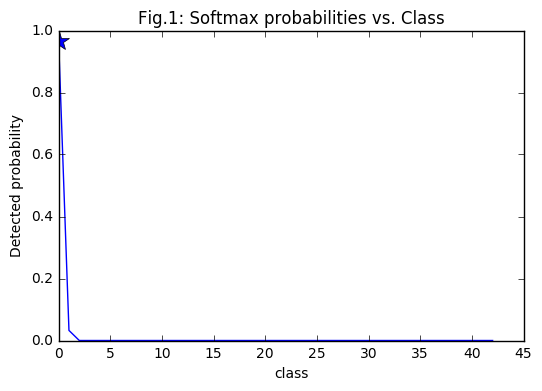

__________________________________________________________________________
Correct label should be = 1


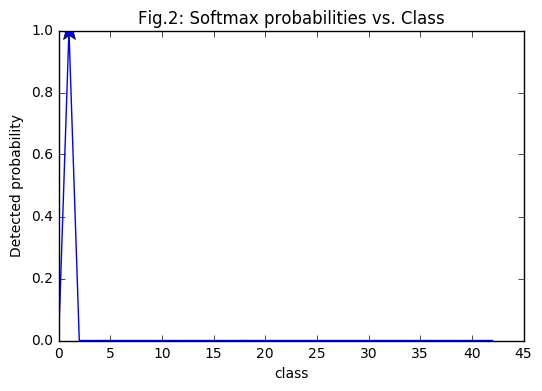

__________________________________________________________________________
Correct label should be = 1


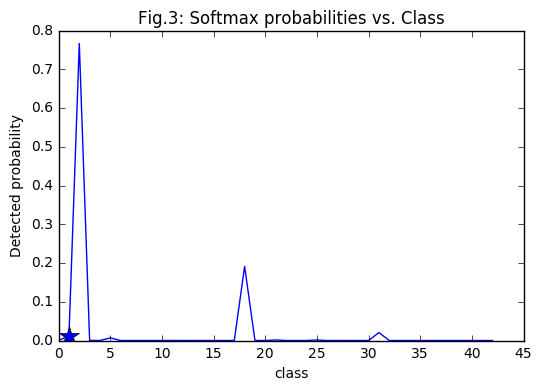

__________________________________________________________________________
Correct label should be = 5


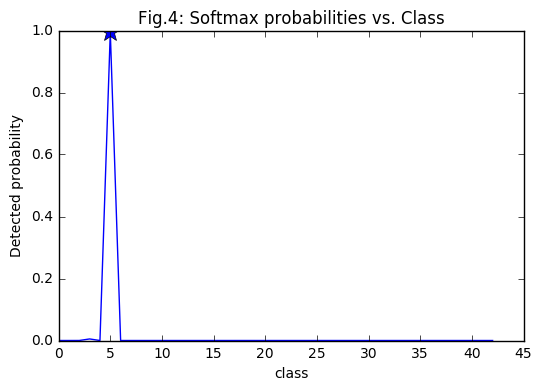

__________________________________________________________________________
Correct label should be = 5


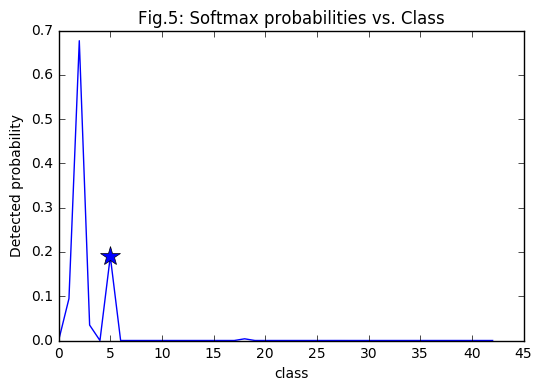

__________________________________________________________________________
Correct label should be = 14


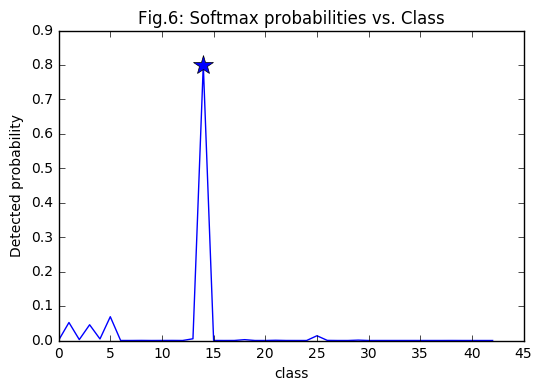

__________________________________________________________________________
Correct label should be = 14


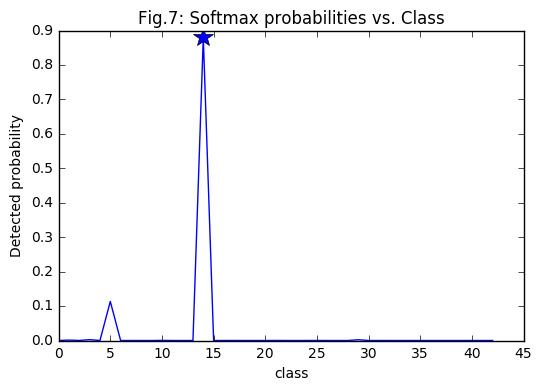

__________________________________________________________________________
Correct label should be = 20


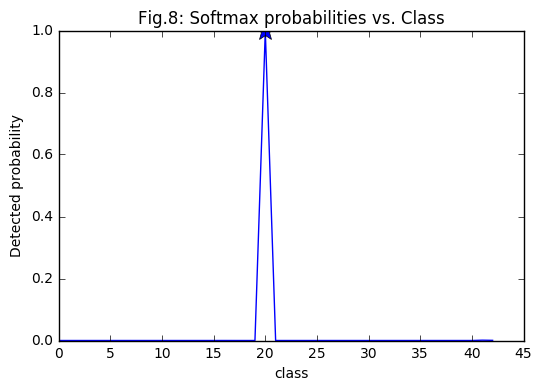

__________________________________________________________________________
Correct label should be = 22


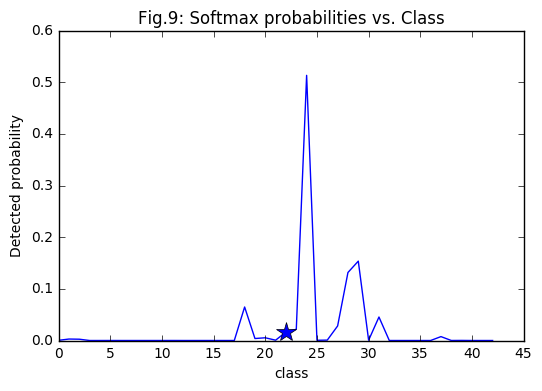

__________________________________________________________________________
Correct label should be = 24


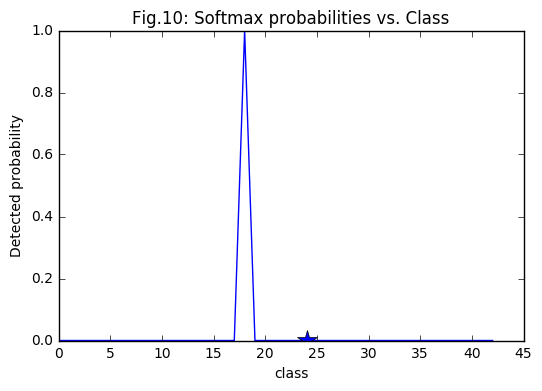

__________________________________________________________________________
Correct label should be = 25


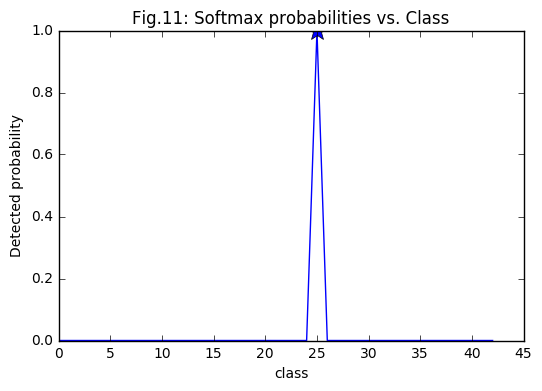

__________________________________________________________________________
Correct label should be = 31


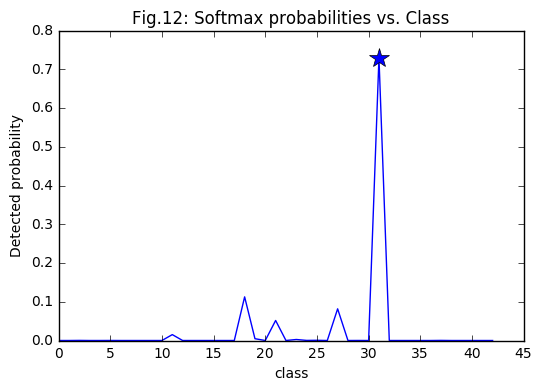

__________________________________________________________________________
Correct label should be = 37


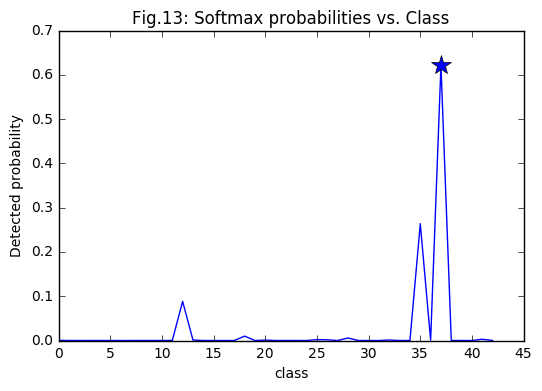

__________________________________________________________________________
Correct label should be = 39


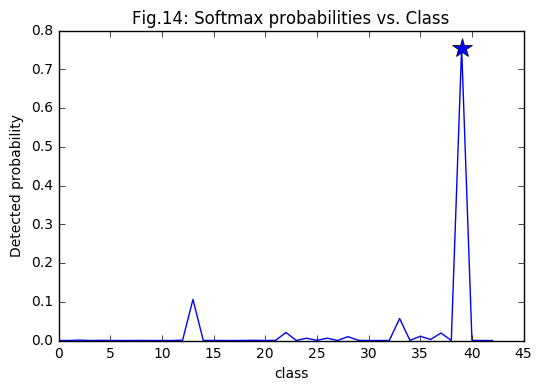

In [34]:
for i in range(0, len(X_extra)):
    plot_data = []
    plot_data.append(X_extra[i])
    print('__________________________________________________________________________')
    print('Correct label should be =',y_extra[i])
    calc_probablitites(plot_data,y_extra[i],i)
    

**Answer:**
In the above figures, solid blue lines show the softmax probabilities for each class and the star determines the correct class that should be identified. A star that is not located at the peak value of the blue curve means incorrect classification. According to the plotted results, in Figures 1, 2, 4, 6, 7, 8, 11, 12, 13, and 14 a correct classification has occred (totally 10 out of 14 => 71.4% accuracy). From the incorrect classifications, Figures 3 belongs to the disoriented 30km/h speed sign, Figure 5 is the shaded 80km/h speed sign, and Figures 9 and 10 are corrseponding to "bumpy road" and "road narrows on the right" signs respectively. According to Figure 5, CNN is not certaion wether the shaded 80km/h sign is 30km/h or 80km/h. It gives more weight to the 30km/h. However, the 80km/h sign is its second best guess. The disoriented 30km/h sign is detected more like a 50km/h sign in Figure3. For the bupmy road as well as road narrows on the right in Figures 9 and 10, the classification is completely wrong.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.